# Homework 1 

## Group 10 

### 2 Learning a policy via MC - Policy Iteration

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import time

LEFT = 0
TOP = 1
RIGHT = 2
DOWN = 3

class GridWorld():
    def __init__(self, size=(5,6)):
        self.size = size
        self.board = np.zeros(size)
        self.board[4,3] = 1
        self.board[4,4] = -1
        self.state = (0,0)

    def get_size(self):
        return self.size

    def get_state(self):
        return self.state

    def get_reward(self, n_step):
        if n_step > 1000:
            return -2
        else: 
            return self.board[self.state]

    def is_legal(self, next_state):
        if ((next_state[0] >= 0) and (next_state[0] < len(self.board))):
            if ((next_state[1] >= 0) and (next_state[1] < len(self.board[0]))):
                if(next_state != (2,2)):
                    return True 
                else: 
                    return False
    
    def is_goal(self):
        if (self.board[self.state] == -1) or (self.board[self.state] == 1):
            return True
        else: 
            return False

    def move(self, action): 
        # origin at top left
        # TOP
        if action == TOP: 
            next_state = (self.state[0] - 1, self.state[1])
        # RIGHT
        if action == RIGHT:
            next_state = (self.state[0], self.state[1] + 1)
        # DOWN
        if action == DOWN:
            next_state = (self.state[0] + 1, self.state[1])
        # LEFT
        if action == LEFT:
            next_state = (self.state[0], self.state[1] -1)
        # check if move is legal
        if self.is_legal(next_state):
            self.state = next_state

    def reset(self):
        self.state = (0,0)

class Agent():
    def __init__(self):
        self.grid_world = GridWorld()
        self.epsilon = 0.8
        self.decay = 0.99
        self.size = self.grid_world.get_size()
        self.policy = np.random.randint(low=0, high=4, size=(self.size[0], self.size[1]))
        self.q_values = np.random.uniform(low=0, high=1, size=(self.size[0], self.size[1], 4))
        self.returns = {}
        for i in range(self.size[0]):
            for j in range(self.size[1]):
                for k in range(4):
                    self.returns[((i,j),k)] = []
    
    def get_action(self):
        if rd.random() < (1-self.epsilon + self.epsilon/4):
            return self.policy[self.grid_world.get_state()]
        else:
            return np.random.randint(low=0, high=4)

    def walk(self):
        episode = []
        self.grid_world.reset()
        n_step = 0
        while(not self.grid_world.is_goal()):
            state = self.grid_world.get_state()
            action = self.get_action()
            self.grid_world.move(action) 
            reward = self.grid_world.get_reward(n_step)
            episode.append((state, action, reward))
            n_step += 1
            if(n_step==1000):
                break
        self.epsilon *= self.decay
        return episode
        

<function matplotlib.pyplot.show(close=None, block=None)>

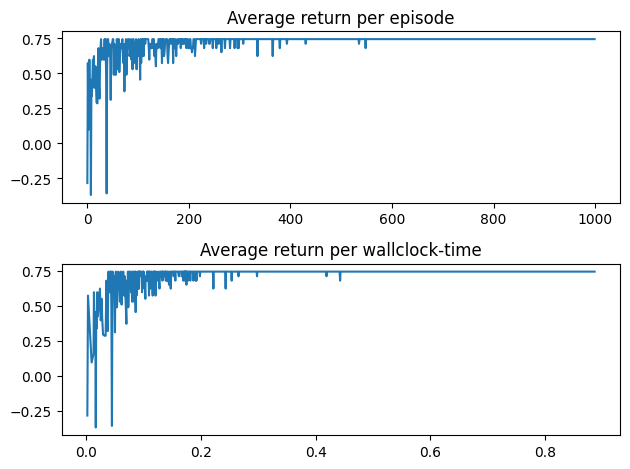

In [2]:
agent = Agent()

n_episodes = 1000
gamma = 0.9
avg_returns = []
start = time.time()
time_per_episode = []

for _ in range(n_episodes):
    # keep track of wether we were in this state before
    returns = []
    visited = []
    # generate an episode following e-greedy policy
    episode = agent.walk()
    G = 0
    for s,a,r in reversed(episode):
        G = gamma * G + r
        if (s,a) not in visited:
            agent.returns[s,a].append(G)
            agent.q_values[s[0], s[1] ,a] = np.mean(agent.returns[s,a])
        returns.append(G)
        # update policy
        agent.policy[s[0], s[1]] = np.argmax(agent.q_values[s[0], s[1], :])
    avg_returns.append(np.mean(returns))
    time_per_episode.append(time.time() - start)

fig, axs = plt.subplots(2)
axs[0].plot(np.arange(n_episodes),avg_returns)
axs[0].set_title("Average return per episode")
axs[1].plot(time_per_episode,avg_returns)
axs[1].set_title("Average return per wallclock-time")
fig.tight_layout()
plt.show